In [1]:
# Decision Tree (DT) :- Here, Decision Boundry (DB) is formed as a step. And trees are made as per the decisions
# Decision points are represented as an oval shape and leaf nodes/ classes are represented in rectangles  
# Decision trees are used as ML model. It is possible to have multiple tree which gives same result.
# So, Decision tree which separate the data in first few steps and gives result in minimum steps is selected as a model DT.

In [2]:
# Entropy:- It is the measure of Heteroginity. How much data is scattered in diff classes
# Entropy = - Summation of (probability(i). log (probability (i)))   Value of entopry varies in between 0 to 1

In [3]:
# Gini:- It is also a measure of heteroginity. (Alternate to Entropy). We use either Entropy or Gini index
# Gini index = 1 - (summation of (probability(i))^2)  Its value varies in between 0 to 0.5

In [4]:
# Information Gain:- It is drop/ reduction in Entropy. It converts heterogenious data into Homogenious data.
#It derived from Task (Task):-It is nothing but criteria to decide which col or feature used for splitting/ making decision
# information gain(IG) = Entropy of main data set - [summation of (ratio of no. of occurance to total data points * entropy of indivial braches of data)]

In [5]:
# The cols. having max IG is uesd to split the data(Decision node).Same method is used for formation of next decision nodes
# The last node where splitting is not possible (having single class) is called as 'leaf node.'

# Implementation of Decision Tree

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../Social_Network_Ads.csv')   # Load data

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
X = df[['Age', 'EstimatedSalary']]    # Find X, y columns
y = df['Purchased'] 

In [10]:
 from sklearn.model_selection import train_test_split    # Split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)

In [12]:
from sklearn.tree import DecisionTreeClassifier    # Import the data

In [13]:
model = DecisionTreeClassifier() #train model & find the accuracy.
model.fit(X_train, y_train)      # Here accuracy is nearly 100, as DT can split any complex data given by making steps
model.score (X_train, y_train), model.score (X_test, y_test)

(0.9966666666666667, 0.87)

In [14]:
#Here, accuracy of test may change bcz to no. of parameters are set to 'None'. To get fixed accuracy, we use 'Random State'
model = DecisionTreeClassifier(random_state=50)
model.fit(X_train, y_train)
model.score (X_train, y_train), model.score (X_test, y_test)

(0.9966666666666667, 0.87)

# Plotting of DB

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# create a grid of 10,000 points of 100 rows and 100 col.
row = np.linspace(df['Age'].min(), df['Age'].max(), 100)  # here scaling is not required. so we need to take original values(min and max) in grid
col = np.linspace(df['EstimatedSalary'].min(), df['EstimatedSalary'].max(), 100)
grid = []    
for r in row:
    for c in col:
        grid.append([r,c])
grid = np.array(grid)

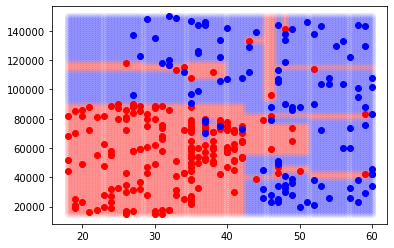

In [17]:
#Predict the values of y for grid and plotting DB for DT. DB is made by DT as per training data, separating almost every pt
y_pre = model.predict(grid)  
class_0 = grid[y_pre == 0]
class_1 = grid[y_pre == 1]
plt.scatter(class_0[:,0],class_0[:,1], c = 'red', alpha = 0.07)  
plt.scatter(class_1[:,0],class_1[:,1], c = 'blue', alpha = 0.07)
plt.scatter(X_train[y_train == 0]['Age'], X_train[y_train == 0]['EstimatedSalary'], c ='red')
plt.scatter(X_train[y_train == 1]['Age'], X_train[y_train == 1]['EstimatedSalary'], c ='blue')

In [18]:
row

array([18.        , 18.42424242, 18.84848485, 19.27272727, 19.6969697 ,
       20.12121212, 20.54545455, 20.96969697, 21.39393939, 21.81818182,
       22.24242424, 22.66666667, 23.09090909, 23.51515152, 23.93939394,
       24.36363636, 24.78787879, 25.21212121, 25.63636364, 26.06060606,
       26.48484848, 26.90909091, 27.33333333, 27.75757576, 28.18181818,
       28.60606061, 29.03030303, 29.45454545, 29.87878788, 30.3030303 ,
       30.72727273, 31.15151515, 31.57575758, 32.        , 32.42424242,
       32.84848485, 33.27272727, 33.6969697 , 34.12121212, 34.54545455,
       34.96969697, 35.39393939, 35.81818182, 36.24242424, 36.66666667,
       37.09090909, 37.51515152, 37.93939394, 38.36363636, 38.78787879,
       39.21212121, 39.63636364, 40.06060606, 40.48484848, 40.90909091,
       41.33333333, 41.75757576, 42.18181818, 42.60606061, 43.03030303,
       43.45454545, 43.87878788, 44.3030303 , 44.72727273, 45.15151515,
       45.57575758, 46.        , 46.42424242, 46.84848485, 47.27

In [19]:
col

array([ 15000.        ,  16363.63636364,  17727.27272727,  19090.90909091,
        20454.54545455,  21818.18181818,  23181.81818182,  24545.45454545,
        25909.09090909,  27272.72727273,  28636.36363636,  30000.        ,
        31363.63636364,  32727.27272727,  34090.90909091,  35454.54545455,
        36818.18181818,  38181.81818182,  39545.45454545,  40909.09090909,
        42272.72727273,  43636.36363636,  45000.        ,  46363.63636364,
        47727.27272727,  49090.90909091,  50454.54545455,  51818.18181818,
        53181.81818182,  54545.45454545,  55909.09090909,  57272.72727273,
        58636.36363636,  60000.        ,  61363.63636364,  62727.27272727,
        64090.90909091,  65454.54545455,  66818.18181818,  68181.81818182,
        69545.45454545,  70909.09090909,  72272.72727273,  73636.36363636,
        75000.        ,  76363.63636364,  77727.27272727,  79090.90909091,
        80454.54545455,  81818.18181818,  83181.81818182,  84545.45454545,
        85909.09090909,  

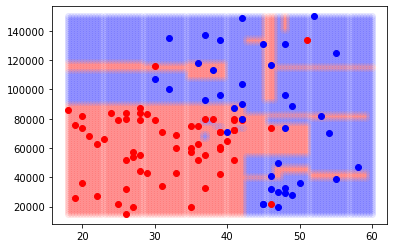

In [20]:
# Plotting for testing data
plt.scatter(class_0[:,0],class_0[:,1], c = 'red', alpha = 0.07)  
plt.scatter(class_1[:,0],class_1[:,1], c = 'blue', alpha = 0.07)
plt.scatter(X_test[y_test == 0]['Age'], X_test[y_test == 0]['EstimatedSalary'], c ='red')
plt.scatter(X_test[y_test == 1]['Age'], X_test[y_test == 1]['EstimatedSalary'], c ='blue')

# Overfitting in DT

In [22]:
# Problem of Decision Tree is 'Overfitting':- It is bcz Dt model tries to classify all the points in training data and draw
# DB accordingly, which makes DB very complicated and problem of Overfitting arises
# Overfitting:-It is observed when, training accuracy is nearly 100% but test acc. is very less (Diff. is 15 - 20% or more)

In [23]:
#Min_Sapmle_leaf:-By setting this parameter, it will create DB(spike) only if seperated(leaf) pts are more than given value

In [25]:
model_1 = DecisionTreeClassifier(random_state=50, min_samples_leaf=3)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=50)

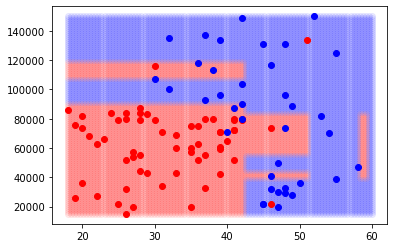

In [27]:
y_pre = model_1.predict(grid)  
class_0 = grid[y_pre == 0]
class_1 = grid[y_pre == 1]
plt.scatter(class_0[:,0],class_0[:,1], c = 'red', alpha = 0.07)  
plt.scatter(class_1[:,0],class_1[:,1], c = 'blue', alpha = 0.07)
plt.scatter(X_test[y_test == 0]['Age'], X_test[y_test == 0]['EstimatedSalary'], c ='red')
plt.scatter(X_test[y_test == 1]['Age'], X_test[y_test == 1]['EstimatedSalary'], c ='blue')

In [31]:
model_1.score(X_train, y_train), model_1.score(X_test, y_test)   # Improved test accuracy and decrese in training accuracy

(0.94, 0.9)

In [32]:
# MAx_Depth:- If the no of steps(nodes/conditions) are more, then model becomes complicated.
# To make model more generalized (simple/least complex) we can restric the no of steps by setting Max_Depth parameter

In [40]:
model_2 = DecisionTreeClassifier(random_state=50, min_samples_leaf=3, max_depth=4)  # It will reduce DB complexity
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=50)

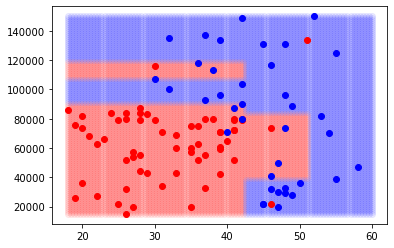

In [41]:
y_pre = model_2.predict(grid)  
class_0 = grid[y_pre == 0]
class_1 = grid[y_pre == 1]
plt.scatter(class_0[:,0],class_0[:,1], c = 'red', alpha = 0.07)  
plt.scatter(class_1[:,0],class_1[:,1], c = 'blue', alpha = 0.07)
plt.scatter(X_test[y_test == 0]['Age'], X_test[y_test == 0]['EstimatedSalary'], c ='red')
plt.scatter(X_test[y_test == 1]['Age'], X_test[y_test == 1]['EstimatedSalary'], c ='blue')

In [42]:
model_2.score(X_train, y_train), model_1.score(X_test, y_test)   #  Decrese in training accuracy and model complexity

(0.93, 0.9)

# Hyper Parameter Tunning

In [49]:
# To reduce overfitting and to get the perfect values of parameters, we use "Hyper Parameter Tunning"(Trail and Error)
# For this we use for loop and required parameters and its values possible values in combinations
# Max used parameters :- Max_depth, min_sample_split, min_sample_leaf, max_features, min_impurity_decrease,

In [50]:
depth = [2,3,4,5,6]                # here, Best parameter values are Max_depth = 5 sample leaf = 3,4,5,6
sample_leaf = [2,3,4,5,6]
for i in depth:
    for j in sample_leaf:
        model_temp = DecisionTreeClassifier(random_state=50, max_depth=i, min_samples_leaf=j)
        model_temp.fit(X_train, y_train)
        print('Max Depth :', i, 'Min sample leaf :', j)
        print('Train Acc :', model_temp.score(X_train, y_train))
        print('Test Acc :', model_temp.score(X_test, y_test), '\n')

Max Depth : 2 Min sample leaf : 2
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 2 Min sample leaf : 3
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 2 Min sample leaf : 4
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 2 Min sample leaf : 5
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 2 Min sample leaf : 6
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 3 Min sample leaf : 2
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 3 Min sample leaf : 3
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 3 Min sample leaf : 4
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 3 Min sample leaf : 5
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 3 Min sample leaf : 6
Train Acc : 0.9133333333333333
Test Acc : 0.92 

Max Depth : 4 Min sample leaf : 2
Train Acc : 0.93
Test Acc : 0.89 

Max Depth : 4 Min sample leaf : 3
Train Acc : 0.93
Test Acc : 0.89 

Max Depth : 4 Min sample leaf : 

In [51]:
# If we want to do HPT by using sklearn then we can use in-built function to find Best parmeters combinations 
# 1) GridSearchCV    2)RandomSearchCV  It can be used by creating a dictionary of parameters and their values

In [55]:
dict1 = {'criterion':['gini', 'entropy'],
         'max_depth':[2,3,4,5,6], 
         'min_samples_leaf':[2,3,4,5,6], 
         'min_samples_split':[2,3,4,5,6]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Parameters to Pass GridSearchCV :- Estimeter- Name of the classifier, param_grid- dict name, cv- Cross validation value 
# CV:- It splits training data in given no of parts, then 1 part will be used for CV and remaining for traning.
# So, it will make given no. combinations of training data and CV it for all times, & avg. of accuracy of all combinations will be considered as accuracy of model

In [83]:
grid_cv = GridSearchCV(DecisionTreeClassifier(), dict1, cv =5, verbose=2)
# Here, we are creatimg 300 model & 5 CV ie. 1500 model tests verbos used to show information

In [84]:
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf

[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=6; total tim

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2; total tim

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5; total tim

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6; total tim

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=2)

In [77]:
grid_cv.best_estimator_    # It will give the Best accuracy pareameter combination

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [78]:
model_final = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, min_samples_split= 2)

In [80]:
model_final.fit(X_train, y_train)  # Training model for best combination of parameters
model_final.score(X_test, y_test)

0.89

In [ ]:
# RandomSearchCV:- It checks random combinations of parameters and find out the Best suited combo. GSCV checks all combos 